### Bu Sayfamızda SMOTE Yani (Sentetik Azınlık Aşırı Örnekleme Tekniği) ile Dengesiz veri dağılımlarını KNN ile artırarak düzelten bir çeşit aracı verimizide kullanacağız.
SMOTE, azınlık sınıfındaki örnekleri KNN (K-En Yakın Komşu) algoritması kullanarak sentetik örnekler üreterek, veri dağılımını dengelemek için kullanılan bir tekniktir. Bu sayede, orijinal veri setindeki azınlık sınıfının temsil edilme oranı arttırılır ve model eğitimi sırasında bu sınıfın daha iyi öğrenilmesi sağlanır.

In [14]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('failure.csv')
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [15]:
df.columns,df.shape

(Index(['date', 'device', 'failure', 'attribute1', 'attribute2', 'attribute3',
        'attribute4', 'attribute5', 'attribute6', 'attribute7', 'attribute8',
        'attribute9'],
       dtype='object'),
 (124494, 12))

In [16]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

date: Verinin toplandığı tarih veya zaman bilgisi.

device: Verinin kaydedildiği cihazın adı veya kimliği.

failure: Hedef değişken; genellikle cihazın arıza yapıp yapmadığını gösteren bir bayrak (0 veya 1).

attribute1, attribute2, ... , attribute9: Cihaza veya sisteme ait çeşitli özellikler veya ölçümler. Bu değişkenler, arıza durumunu tahmin etmek için modelin öğrenmesi gereken bağımsız değişkenlerdir.

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(df.drop(['failure','date','device'], axis=1))  # Özellik matrisini oluştur
y = df['failure']  # Hedef değişken

Text(0, 0.5, 'Örnek Sayısı')

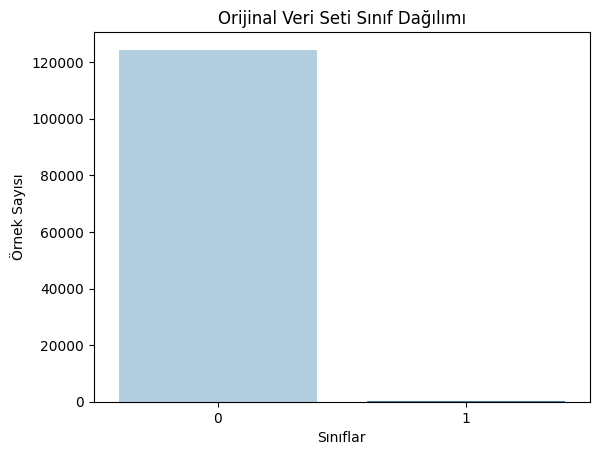

In [18]:
sns.countplot(x=y, palette="Blues")
plt.title("Orijinal Veri Seti Sınıf Dağılımı")
plt.xlabel("Sınıflar")
plt.ylabel("Örnek Sayısı")

In [19]:
from imblearn.over_sampling import SMOTE

# SMOTE ile veri dengelemeişlemi yapma 
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

Text(0, 0.5, 'Örnek Sayısı')

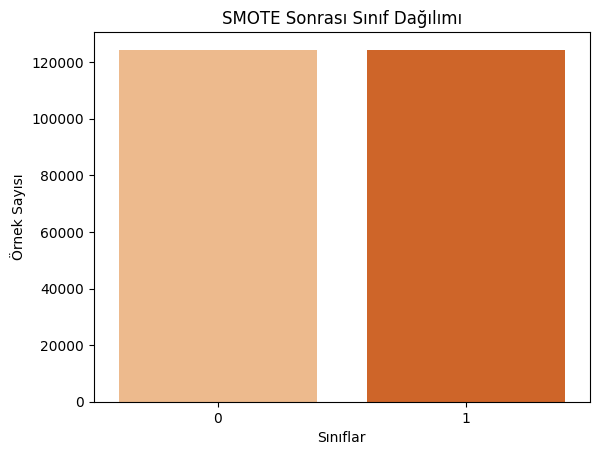

In [20]:
sns.countplot(x=y, palette="Oranges")
plt.title("SMOTE Sonrası Sınıf Dağılımı")
plt.xlabel("Sınıflar")
plt.ylabel("Örnek Sayısı")

In [21]:
x.shape,y.shape

((248776, 9), (248776,))

In [22]:
from sklearn.model_selection import train_test_split

# Eğitim ve test setlerine ayır
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')
# Modelleri tanımla
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    
]

# Modelleri eğit ve değerlendir
for model in models:
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    print(f'{model.__class__.__name__} accuracy: {accuracy}')


LogisticRegression accuracy: 0.7922059651097355
DecisionTreeClassifier accuracy: 0.9985328402604711
RandomForestClassifier accuracy: 0.999557842270279


### Düzeltilmiş Denge: SMOTE uygulandıktan sonra hedef sütunundaki sınıf dengesizliği düzeltilir, çünkü azınlık sınıfı örnekleri artırılmıştır ve modelin her iki sınıfı da daha dengeli bir şekilde öğrenmesi sağlanır.